In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data import

Import the data from the dataset and print out the name of each feature

In [2]:
PR_data = pd.read_csv('new_pullreq.csv')
pd.set_option('display.max_columns',None)
PR_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.04600,0.00000,0.000000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.0,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.0,1.0,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,0,0,1,1,0,0,0,0,2,2,1,474.0,2,0.014019,38,147.48200,16.18700,21.582700,1,299,1.000000,38,0,0,0,2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1312,NaN,1.0,79.0,1.0,0.0,1.0,failure,failure,Python,1,6,1,1.000000,7,NaN,9.0,432,0,1092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,300,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,0,0,2,2,2,0,0,0,0,0,0,143159.0,5,0.014706,24,120.71000,0.00000,10.109800,2194,293,0.989761,222,110,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,94,NaN,1.0,489.0,1.0,1.0,0.0,success,success,Go,269,37,212,0.986523,29,NaN,978.0,1050,0,3489,1,male,canada,NaN,0.814346,0.633765,0.471257,0.666831,0.485847,0.0,0.000000,0.000000,NaN,679,NaN,NaN,0.818143,0.630804,0.466899,0.650931,0.496465,0.0,0.0,0.0,NaN,1,460,0.138889,NaN,NaN,0.003796,0.002961,0.004358,0.015900,0.010618,0,0,0,0,0,0,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,0,0,2,2,2,0,0,0,1,1,1,6247.0,2,0.173077,7,554.16800,28.61830,84.142200,131,3,1.000000,1,60,0,0,

In [3]:
PR_data[PR_data['project_id']==13708387]

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.046,0.00000,0.0000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.000000,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.000000,1.000000,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
4488,4489,13708387,stylelint,stylelint,1,7769,7769.0,7,218,103,3,0,4,7,3,0,1,3,22,39,3,6477.0,5,0.116910,69,681.062,0.00000,0.0000,673,1,1.000000,345,263,58,14,39,0.102564,0.230769,0.666667,3,1,2,2,0,0,1,0,71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,30,14,42,0.979351,5,12.0,14714.0,2,0,1497,0,male,united kingdom,NaN,0.813158,0.593229,0.444595,0.701420,0.529748,0.272727,0.272727,0.454545,neutral,142,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.285714,0.714286,neutral,0,13,0.428571,NaN,NaN,0.003895,0.061230,0.047270,0.036098,0.006232,1,1,1,1,1,1,0,11,17,0,3.0,0,0.001325,0,7769,0
5279,5280,13708387,stylelint,stylelint,1,589,589.0,2,212,244,4,0,22,26,21,1,4,0,1,1,1,19323.0,11,0.094156,20,713.504,9.59286,18.1182,3474,298,0.983221,64,398,58,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,1,24,NaN,1.0,29885.0,1.0,1.0,0.000000,success,success,JavaScript,316,30,80,0.979310,37,NaN,261.0,1375,0,2224,1,NaN,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.000000,0.000000,1.000000,neutral,428,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,449,0.186047,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,0,1,0,0,0.0,0,0.286101,0,589,0
6798,6799,13708387,stylelint,stylelint,1,14642,14642.0,3,8,0,0,0,1,1,1,0,0,0,7,7,4,18893.0,11,0.151420,2,711.504,9.60481,18.2629,3321,0,0.000000,6,6,2,0,7,0.000000,0.000000,1.000000,4,0,0,0,0,0,1,0,19,NaN,1.0,403.0,2.0,0.0,0.500000,failure,success,JavaScript,300,29,69,0.978817,37,7.0,284613.0,1,1,1879,0,NaN,NaN,NaN,0.804032,0.659139,0.463307,0.655809,0.469856,0.000000,0.000000,1.000000,neutral,403,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,4,0.069767,NaN,NaN,0.013020,0.004680,0.028558,0.00951

In [4]:
for column in PR_data.columns:
    print(column)

id
project_id
ownername
reponame
merged_or_not
lifetime_minutes
mergetime_minutes
num_commits
src_churn
test_churn
files_added
files_deleted
files_modified
files_changed
src_files
doc_files
other_files
num_commit_comments
num_issue_comments
num_comments
num_participants
sloc
team_size
perc_external_contribs
commits_on_files_touched
test_lines_per_kloc
test_cases_per_kloc
asserts_per_kloc
watchers
prev_pullreqs
requester_succ_rate
followers
churn_addition
churn_deletion
pr_comment_num
comment_num
perc_neg_emotion
perc_pos_emotion
perc_neu_emotion
part_num_issue
part_num_commit
part_num_pr
part_num_code
comment_conflict
hash_tag
at_tag
test_inclusion
description_length
bug_fix
ci_exists
ci_latency
ci_build_num
ci_test_passed
ci_failed_perc
ci_first_build_status
ci_last_build_status
language
fork_num
project_age
open_issue_num
pr_succ_rate
open_pr_num
first_response_time
pushed_delta
acc_commit_num
first_pr
account_creation_days
core_member
contrib_gender
contrib_country
contrib_affiliati

# Data cleaning

To select the features we want from 118 Numbers,and get a new dataframe named **Project_feature_data**.

In [5]:
Project_feature_data= PR_data[['project_id','language','project_age','pushed_delta','pr_succ_rate','open_issue_num','open_pr_num','fork_num','merged_or_not','core_member']]
Project_feature_data

,project_id,language,project_age,pushed_delta,pr_succ_rate,open_issue_num,open_pr_num,fork_num,merged_or_not,core_member
0,13708387,JavaScript,21,196583.0,0.978469,52,25,140,1,0
1,100297899,Python,6,9.0,1.000000,1,7,1,0,1
2,93139005,JavaScript,6,5743.0,0.996324,0,10,11,1,1
3,15059440,Go,37,978.0,0.986523,212,29,269,1,1
4,29684214,Python,25,517153.0,0.978495,93,9,64,1,0
...,...,...,...,...,...,...,...,...,...,...
3347932,30544060,JavaScript,20,18087.0,1.000000,2,0,0,1,1
3347933,1142,Python,55,431.0,0.965155,3359,372,2454,0,1
3347934,31499094,JavaScript,9,78766.0,0.992126,62,8,125,1,0
3347935,55317,JavaScript,27,995650.0,0.991597,174,0,84,0,0


The statistics are centralized with how many projects, and there are 112,30 projects.

In [6]:
Project_data = Project_feature_data[['project_id']].drop_duplicates(subset=['project_id'])
Project_data

,project_id
0,13708387
1,100297899
2,93139005
3,15059440
4,29684214
...,...
632247,41631382
661336,81645409
691799,5621076
765017,109398748


# Characteristics1:Program language

First of all, the data set will be processed, and the program language of each project will be counted.

In [7]:
program_language = Project_feature_data[['project_id','language']].drop_duplicates(subset=['project_id'])
language_num=program_language['language'].value_counts().tolist()
language = ['JavaScript','Python','Java','Ruby ','Go','Scala']
print(language_num)

[3879, 3055, 1823, 1243, 913, 317]


## Bar：

<ipython-input-97-f3637b758c67>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


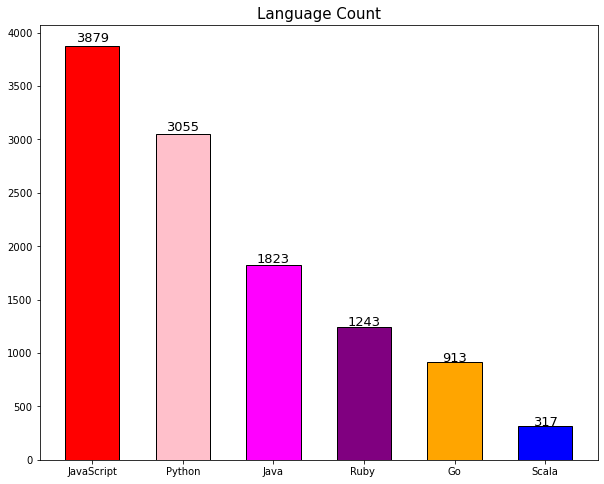

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red','pink','magenta','purple','orange','blue']
ax.bar(x=language,
       height=language_num,
       width=0.6,  
       align="center",
       color=colors,
       edgecolor="black",
       linewidth=1.0
       )
ax.set_title("Language Count", fontsize=15)
xticks = ax.get_xticks()
for i in range(len(language_num)):
    xy = (xticks[i], language_num[i]*1.01)
    s = str(language_num[i])
    ax.annotate(
        s=s,
        xy=xy,
        fontsize=13,
        color="black",
        ha="center",
        va="baseline"
    )

## Pie：

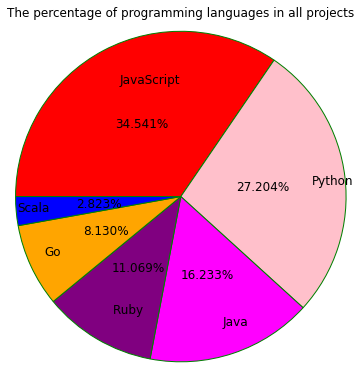

In [47]:
plt.axes(aspect='equal')
plt.xlim(0,5)
plt.ylim(0,5)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.pie(x=language_num, 
        labels=language,
        colors=colors,
        autopct='%.3f%%',
        pctdistance=0.5,
        labeldistance=0.8,
        startangle=180,
        center=(2.5,1),
        radius=3.8,
        counterclock= False,
        wedgeprops= {'linewidth':1,'edgecolor':'green'},
        textprops= {'fontsize':12,'color':'black'},
        frame=1)
plt.xticks(())
plt.yticks(())
plt.title('The percentage of programming languages in all projects')

plt.show()

## Count the number of Merged and Merge Failed

In [9]:
program_language_merge=Project_feature_data[['language','merged_or_not','core_member']]
program_language_merge

,language,merged_or_not,core_member
0,JavaScript,1,0
1,Python,0,1
2,JavaScript,1,1
3,Go,1,1
4,Python,1,0
...,...,...,...
3347932,JavaScript,1,1
3347933,Python,0,1
3347934,JavaScript,1,0
3347935,JavaScript,0,0


Count the number of language pull requests that are merged or not merged

In [10]:
JavaScript = program_language_merge[program_language_merge['language']=='JavaScript']
JavaScript_merge=JavaScript['merged_or_not'].value_counts().tolist()
JavaScript_merge

[815182, 178134]

In [11]:
Python = program_language_merge[program_language_merge['language']=='Python']
Python_merge=Python['merged_or_not'].value_counts().tolist()
Python_merge

[751833, 172645]

In [12]:
Java = program_language_merge[program_language_merge['language']=='Java']
Java_merge=Java['merged_or_not'].value_counts().tolist()
Java_merge

[513864, 139836]

In [13]:
Ruby = program_language_merge[program_language_merge['language']=='Ruby']
Ruby_merge=Ruby['merged_or_not'].value_counts().tolist()
Ruby_merge

[298472, 72569]

In [14]:
Go = program_language_merge[program_language_merge['language']=='Go']
Go_merge=Go['merged_or_not'].value_counts().tolist()
Go_merge

[239477, 41706]

In [15]:
Scala = program_language_merge[program_language_merge['language']=='Scala']
Scala_merge=Scala['merged_or_not'].value_counts().tolist()
Scala_merge

[91268, 32951]

Collect statistics on the number of pull requests in different languages that are merged or not merged.

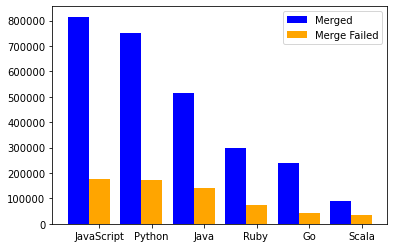

In [16]:
merge = [815182,751833,513864,298472,239477,91268]
not_merge = [178134,172645,139836,72569,41706,32951]
x = list(range(len(merge)))
total_width,n = 0.8,2
width = total_width/n
plt.bar(x,merge,width=width,label='Merged',fc = 'b')
for i in range(len(x)):
    x[i]=x[i]+width
plt.bar(x,not_merge,width=width,label='Merge Failed',tick_label = language,fc = 'orange')
plt.legend()
plt.show()

## Association Rules

In [17]:
language_merge = program_language_merge=Project_feature_data[['language','merged_or_not']]
language_merge_list=language_merge.values.tolist()
for i in range(len(language_merge_list)):
    if language_merge_list[i][1]==1:
        language_merge_list[i][1] = 'Merged'
    else:
        language_merge_list[i][1] = 'Merge Failed'

In [18]:
language_merge

,language,merged_or_not
0,JavaScript,1
1,Python,0
2,JavaScript,1
3,Go,1
4,Python,1
...,...,...
3347932,JavaScript,1
3347933,Python,0
3347934,JavaScript,1
3347935,JavaScript,0


In [55]:
te = TransactionEncoder()
df_tf = te.fit_transform(language_merge_list)
df = pd.DataFrame(df_tf,columns=te.columns_)
df.drop('Merge Failed',axis=1,inplace=True)
frequent_itemsets = apriori(df,min_support=0.001,use_colnames= True)
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.15)
rules.drop(index=[2,3,5],inplace=True)

In [56]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Go),(Merged),0.083987,0.809482,0.071530,0.851677,1.052125,0.003544,1.284475
1,(Java),(Merged),0.195255,0.809482,0.153487,0.786085,0.971096,-0.004568,0.890625
4,(JavaScript),(Merged),0.296695,0.809482,0.243488,0.820667,1.013817,0.003319,1.062370
6,(Python),(Merged),0.276134,0.809482,0.224566,0.813251,1.004656,0.001041,1.020182
7,(Ruby),(Merged),0.110827,0.809482,0.089151,0.804418,0.993743,-0.000561,0.974105
8,(Scala),(Merged),0.037103,0.809482,0.027261,0.734735,0.907660,-0.002773,0.718215


In [88]:
lift = rules['lift'].values.tolist()
lift_list=sorted(lift)
lift_name = ['Scala','Java','Ruby','Python','JavaScript','Go']

Text(0, 0.5, 'Lift')

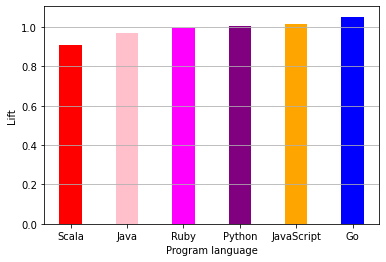

In [100]:
fig1 = plt.figure()
plt.grid(axis='y')
plt.bar(lift_name,lift_list,0.4,color=colors)

plt.xlabel('Program language')
plt.ylabel('Lift')

# Characteristics2:Popularity of project

# Characteristics3:Age of project

# Characteristics4:Workload of a project

# Characteristics5：Activeness of project

# Characteristics6：Openness of a project